  ## Load the standard libraries
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

## Outlier Identification :

### Method - I : Box plot method

<Axes: >

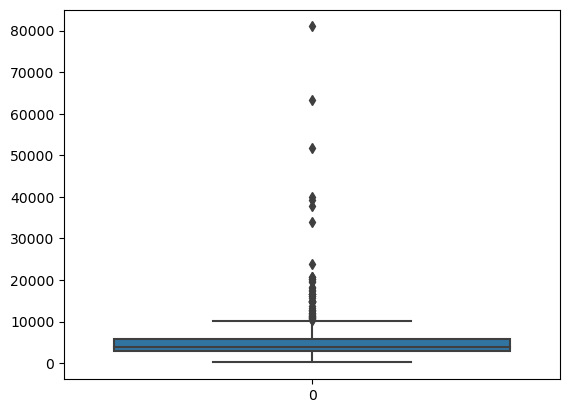

In [4]:
sns.boxplot(data['ApplicantIncome'])

In [5]:
  data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

## Method 2: Scatter plot method  

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

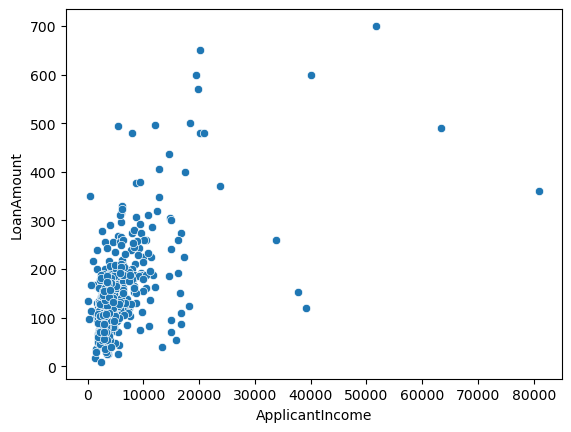

In [6]:
sns.scatterplot(x = data['ApplicantIncome'], y = data['LoanAmount'])

## Method 3 : Whisker method

In [7]:
data['ApplicantIncome'].quantile(0.75)

5795.0

In [8]:
iqr = data['ApplicantIncome'].quantile(0.75) - data['ApplicantIncome'].quantile(0.25)
iqr

2917.5

In [10]:
UW = data['ApplicantIncome'].quantile(0.75) + 1.5 * iqr
UW

10171.25

In [13]:
LW = data['ApplicantIncome'].quantile(0.25) - 1.5 * iqr
LW

-1498.75

In [15]:
data[(data['ApplicantIncome'] < LW) | (data['ApplicantIncome'] > UW)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N


In [16]:
data[(data['ApplicantIncome'] < LW) | (data['ApplicantIncome'] > UW)].shape

(50, 13)

## Method 4 : Curve method|

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

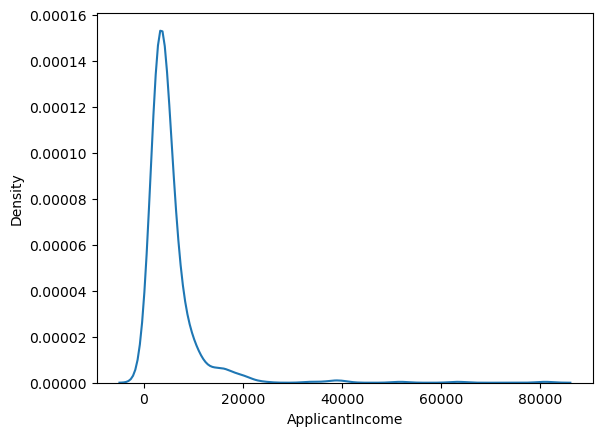

In [17]:
sns.kdeplot(data['ApplicantIncome'])

In [18]:
data['ApplicantIncome'].skew()

6.539513113994625

In [19]:
data['ApplicantIncome'].kurtosis()

60.54067593369113

## Outlier Treatment

In [20]:
arr = np.array([10, 23, 34, 47, 98,87,65, 99])
arr

array([10, 23, 34, 47, 98, 87, 65, 99])

In [21]:
## Replace all the values greater than 50 in arr with 700

In [24]:
for num in range(len(arr)):
    if arr[num] > 50:
        arr[num] = 700
print(arr)

[ 10  23  34  47 700 700 700 700]


In [25]:
np.where(arr > 50, 700, arr)

array([ 10,  23,  34,  47, 700, 700, 700, 700])

In [26]:
np.where(arr % 2 == 0, 2400, arr)

array([2400,   23, 2400,   47, 2400, 2400, 2400, 2400])

## Treatment Method 1 : Quantile based flooring and capping

In [27]:
  data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
np.where(data['ApplicantIncome'] < data['ApplicantIncome'].quantile(0.10), 
         data['ApplicantIncome'].quantile(0.1), 
         data['ApplicantIncome'])

In [ ]:
np.where(data['ApplicantIncome'] > data['ApplicantIncome'].quantile(0.90), 
         data['ApplicantIncome'].quantile(0.9), 
         data['ApplicantIncome'])